### Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [25]:

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
# Source - https://stackoverflow.com/a
# Posted by dgruending
# Retrieved 2025-12-03, License - CC BY-SA 4.0

%matplotlib inline


### Importing DataSet

#### About Dataset


This dataset captures a comprehensive snapshot of criminal activities across multiple Indian cities from 2020 to 2024. It includes detailed information about the type of crime, the date and time of occurrence, the weapon used, victim demographics, and the level of police deployment. With crimes ranging from identity theft to homicide, this dataset offers valuable insights for researchers, policymakers, and law enforcement agencies aiming to understand crime patterns and improve public safety. The data also includes information on whether the case was closed, providing a clear view of crime resolution rates across cities

In [6]:
df = pd.read_csv('Data/crime_dataset_india.csv')

In [7]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [8]:
# Let's first analyze the dataset as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [14]:
df.set_index(df['Report Number'], inplace = True)

In [15]:
# Let's Generate a Ydata Profile Report for this DataSet

# Generate the report
profile = ProfileReport(df,title="Indian Crimes Dataset")

# Save the report to .html
profile.to_file("indian_crimes.html")

Summarize dataset:  11%| | 2/19 [00:00<00:04,  3.53it/s, Describe variable: Weap
Summarize dataset:  42%|▍| 8/19 [00:02<00:04,  2.73it/s, Describe variable: Date
Summarize dataset:  63%|▋| 12/19 [00:13<00:15,  2.25s/it, Describe variable: Dat
Summarize dataset:  68%|▋| 13/19 [00:16<00:13,  2.28s/it, Describe variable: Dat
Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 345.78it/s]


In [11]:
# You can open and check indian_Crimes.html for the Profile Report it has all the info about the data

In [16]:
# Further we will Perform the EDA Here:

### Univariate Analysis

In [18]:
# Report Number is not helpful for the Analysis so starting with Numerical Columns First
# - Victim Age

### 1. Victim Age
**Conclusion**
1. victim Age is normally Distributed
2. There is no Missing Value for the age columns
3. Stats

count    40160.00000

mean        44.49126

std         20.22555

min         10.00000

25%         27.00000

50%         44.00000

75%         62.00000

max         79.00000


In [19]:
df['Victim Age'].describe()

count    40160.00000
mean        44.49126
std         20.22555
min         10.00000
25%         27.00000
50%         44.00000
75%         62.00000
max         79.00000
Name: Victim Age, dtype: float64

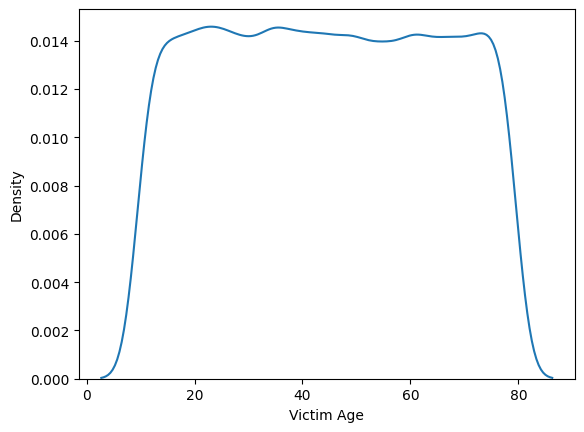

In [30]:
sns.kdeplot(data = df, x = "Victim Age")
plt.show()

In [31]:
df['Victim Age'].skew()  # ->  Normal Distribution

np.float64(0.008245431124500779)

In [32]:
df['Victim Age'].isnull().sum()

np.int64(0)

### 2. Police Deployed
**Conclusion**
1. Column is normally Distributed
2. No Missing Values for this col.
3. Stats

count    40160.000000

mean        10.006250

std          5.467951

min          1.000000

25%          5.000000

50%         10.000000

75%         15.000000

max         19.000000

In [34]:
df['Police Deployed'].describe()

count    40160.000000
mean        10.006250
std          5.467951
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: Police Deployed, dtype: float64

<Axes: ylabel='Density'>

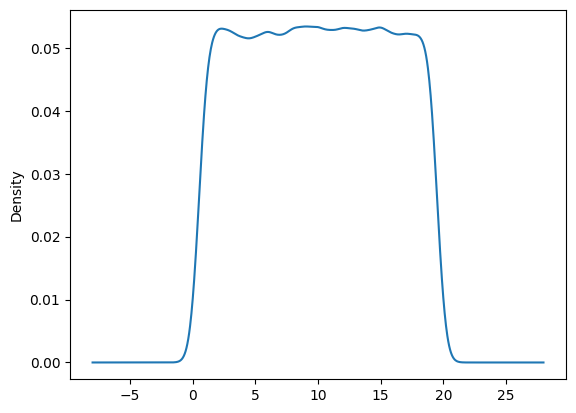

In [35]:
df['Police Deployed'].plot(kind = "kde")

In [36]:
df['Police Deployed'].skew() # Almost Normal Distribution

np.float64(-0.0038525496521411053)

In [37]:
df['Police Deployed'].isnull().sum()

np.int64(0)

### 3. City
**Conclusion**
1. Delhi has the most Crimes followed by Mumbai and Kolkata
2. No Missing Values for this col.


In [54]:
df['City'].value_counts().head(10)

City
Delhi        5400
Mumbai       4415
Bangalore    3588
Hyderabad    2881
Kolkata      2518
Chennai      2493
Pune         2212
Ahmedabad    1817
Jaipur       1479
Lucknow      1456
Name: count, dtype: int64

/var/folders/n2/xblt95t12h7cjhv3hf2dtsw00000gn/T/ipykernel_98320/50106910.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0, 0, 'Ahmedabad'),
 Text(1, 0, 'Chennai'),
 Text(2, 0, 'Ludhiana'),
 Text(3, 0, 'Pune'),
 Text(4, 0, 'Delhi'),
 Text(5, 0, 'Mumbai'),
 Text(6, 0, 'Surat'),
 Text(7, 0, 'Visakhapatnam'),
 Text(8, 0, 'Bangalore'),
 Text(9, 0, 'Kolkata'),
 Text(10, 0, 'Ghaziabad'),
 Text(11, 0, 'Hyderabad'),
 Text(12, 0, 'Jaipur'),
 Text(13, 0, 'Lucknow'),
 Text(14, 0, 'Bhopal'),
 Text(15, 0, 'Patna'),
 Text(16, 0, 'Kanpur'),
 Text(17, 0, 'Varanasi'),
 Text(18, 0, 'Nagpur'),
 Text(19, 0, 'Meerut'),
 Text(20, 0, 'Thane'),
 Text(21, 0, 'Indore'),
 Text(22, 0, 'Rajkot'),
 Text(23, 0, 'Vasai'),
 Text(24, 0, 'Agra'),
 Text(25, 0, 'Kalyan'),
 Text(26, 0, 'Nashik'),
 Text(27, 0, 'Srinagar'),
 Text(28, 0, 'Faridabad')]

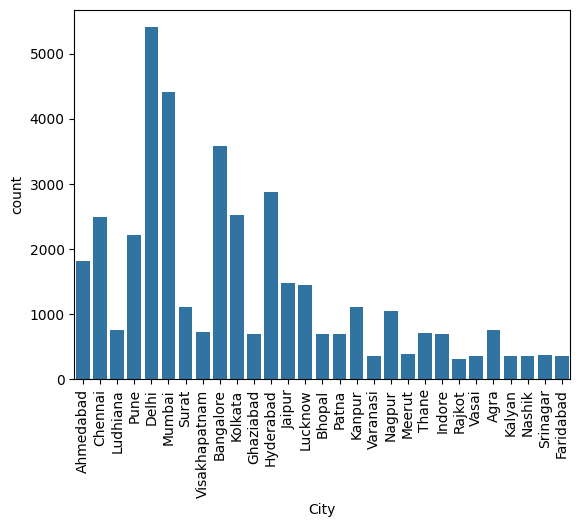

In [53]:
# df['City'].value_counts().plot(kind = "bar")
ax = sns.countplot(data = df, x = "City", orient = "h")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

In [55]:
df['City'].isnull().sum()

np.int64(0)